<a href="https://colab.research.google.com/github/thalitazhrr/PCAandMDS_Task/blob/main/18222023_Thalita_Zahra_Sutejo_Tugas_PCA_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment Data Analytics: Implementation and Comparative Analysis of PCA and MDS**
## *Dimensionality Reduction and Visualization of the Iris Dataset Using PCA and MDS*
## Thalita Zahra Sutejo
### Student ID: **18222023**
### Class: **18222023**

***In this project, dimensionality reduction techniques—Principal Component Analysis (PCA) and Multidimensional Scaling (MDS)—were applied to the Iris dataset to explore and visualize its structure in a two-dimensional space. Through a combination of preprocessing steps and mathematical transformations, the goal was to examine how well each method captures and presents the underlying class separability. This analysis aims to highlight the similarities and differences between these two commonly used techniques and their applicability to structured, low-dimensional datasets such as Iris.***



## Import Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

## Import Dataset

In [49]:
# File ID from Google Drive
# https://drive.google.com/file/d/1bw5zHssUkYYBbix5yMK7CR4qkzm5aTcw/view?usp=drive_link => File ID: 1bw5zHssUkYYBbix5yMK7CR4qkzm5aTcw
# https://drive.google.com/uc?id={file_id}
url = 'https://drive.google.com/uc?id=1bw5zHssUkYYBbix5yMK7CR4qkzm5aTcw'

df = pd.read_csv(url, sep=',', header=None, names=["sepal length", "sepal width", "petal length", "petal width", "class"])
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
# Categorical Column
categorical_columns = [
    'class'
]

numerical_columns = [col for col in df.columns if col not in categorical_columns]

# DataFrame Categorical
df_categorical = df[categorical_columns]
df_numerical= df[categorical_columns]

column_info = []

for col in df.columns:
    tipe = 'Categorical' if col in categorical_columns else 'Numerical'
    column_info.append({'Nama Kolom': col, 'Tipe Data': tipe})

df_info = pd.DataFrame(column_info)
df_info

,Nama Kolom,Tipe Data
0,sepal length,Numerical
1,sepal width,Numerical
2,petal length,Numerical
3,petal width,Numerical
4,class,Categorical


# 2. Data Cleaning and Preprocessing

## Data Cleaning

Data Cleaning is a crucial initial step in any data analysis or machine learning workflow. It involves identifying and correcting errors, inconsistencies, and inaccuracies within the dataset to ensure the quality and reliability of subsequent analysis. The process typically includes handling missing values by either imputing or removing them, depending on the extent and nature of the missing data. Duplicate entries are also identified and removed to avoid bias and redundancy. In addition, data validation is performed to ensure that the values conform to expected formats or ranges, and to catch any anomalies caused by human or system errors. Outliers, which can significantly distort the results, are detected and either removed or treated appropriately. Overall, effective data cleaning enhances the accuracy, efficiency, and trustworthiness of data-driven insights.



### Handling Missing Values

In [51]:
df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


### Remove Duplicates

In [52]:
df.duplicated().sum()

np.int64(3)

In [53]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [54]:
df = df.drop_duplicates().reset_index(drop=True)

In [55]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


### Data Validation

In [56]:
df.dtypes

,0
sepal length,float64
sepal width,float64
petal length,float64
petal width,float64
class,object


In [57]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Dealing with Outliers

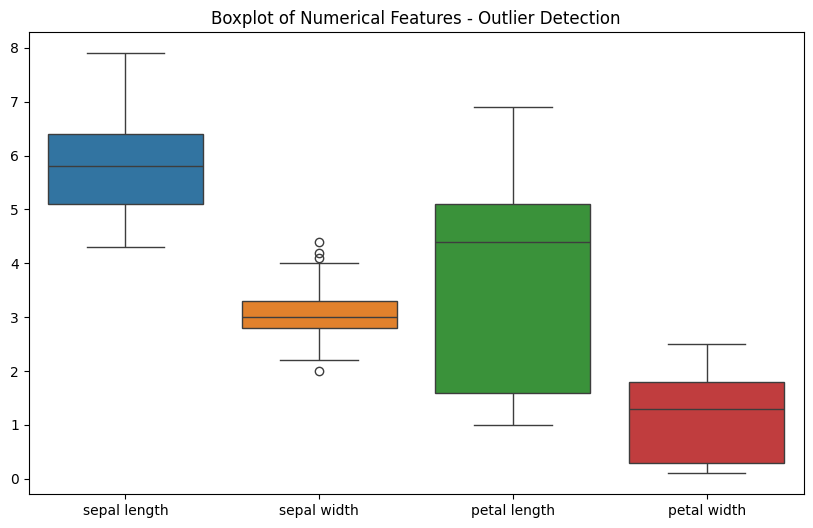

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features - Outlier Detection")
plt.show()

Based on the boxplot visualization of the numerical features, a few outliers were detected in the sepal width attribute. However, after careful consideration, these outliers were not removed from the dataset. This decision was made because the Iris dataset is a well-established benchmark in the machine learning community, and the identified outliers are likely to represent valid variations in the data rather than data entry errors. Additionally, since dimensionality reduction techniques like PCA and MDS are sensitive to feature scales, the features were standardized prior to analysis. This standardization process helps to reduce the influence of outliers, ensuring they do not disproportionately impact the results. Therefore, retaining the outliers allows the analysis to remain faithful to the original dataset while still maintaining robust and meaningful results.

## Data Preprocessing

Before applying dimensionality reduction techniques such as PCA and MDS, the dataset must be properly preprocessed to ensure compatibility with these algorithms and to preserve the integrity of the analysis. The preprocessing steps performed include:

1. Separating numerical features from the categorical label to isolate the variables relevant for projection

2. Standardizing the numerical features using z-score normalization, so that each feature has a mean of 0 and a standard deviation of 1, ensuring fair contribution to the distance calculations

### Standardization (z-score)

In [59]:
# Separate features (X) and label (y)
X = df.drop(columns=['class'])  # Numerical features only
y = df['class']                 # Label column

# Standardize features using z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display statistics before and after standardization
print("Statistics before standardization:")
print(pd.DataFrame(X, columns=X.columns).describe())

print("\nStatistics after standardization:")
print(pd.DataFrame(X_scaled, columns=X.columns).describe())

Statistics before standardization:
       sepal length  sepal width  petal length  petal width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Statistics after standardization:
       sepal length   sepal width  petal length   petal width
count  1.470000e+02  1.470000e+02  1.470000e+02  1.470000e+02
mean  -4.833624e-17  1.691768e-16 -2.416812e-16 -3.383537e-16
std    1.003419e+00  1.003419e+00  1.003419e+00  1.003419e+00
min   -1.883710e+00 -2.424189e+00 -1.585902e+00 -1.468099e+00
25%   -9.155095e-01 -5.873036e-01 -1.243654e+00 -1.203301e+00
50%   -6.833389e-0

## Dimensionality Reduction / Feature Engineering

Dimensionality reduction is an essential step in exploratory data analysis and model preparation, especially when dealing with high-dimensional datasets. This process transforms the original features into a lower-dimensional space while retaining as much of the relevant information as possible. In this study, Principal Component Analysis (PCA) and Multidimensional Scaling (MDS) were employed as dimensionality reduction techniques. PCA reduces dimensions by identifying directions (principal components) that capture the highest variance in the data, making it suitable for linearly structured datasets. Meanwhile, MDS preserves the pairwise distances between data points, allowing the spatial relationships within the dataset to be reflected in lower dimensions. These techniques not only help in visualizing complex data structures but also in mitigating issues such as the curse of dimensionality and noise, ultimately facilitating better interpretation and analysis.

### PCA and MDS Implementation from Scratch

*Preprocessing Overview*

Before applying dimensionality reduction techniques, preprocessing was conducted to ensure the quality and consistency of the dataset. This included removing duplicates and standardizing all numerical features using z-score normalization (mean = 0, standard deviation = 1). The label column, class, was separated and preserved only for visualization purposes since PCA and MDS operate on numerical features.

#### PCA and MDS Implementation from Scratch on Iris Dataset

##### PCA (Principal Component Analysis) Implementation from Scratch on Iris Dataset

Step 1: Calculate the Mean of Each Feature

*Purpose: Determine the average value of each column for centering the data (subtracting the mean so the features are centered at zero).*

In [60]:
# Step 1: Calculate the mean of each feature
mean_vec = np.mean(X_scaled, axis=0)
print("Mean vector:\n", mean_vec)

Mean vector:
 [-4.83362405e-17  1.69176842e-16 -2.41681203e-16 -3.38353684e-16]


Step 2: Compute the Covariance Matrix

*The covariance matrix shows the degree of correlation between features. This is crucial because PCA identifies directions with the highest variance.*

In [61]:
# Step 2: Compute the covariance matrix (between features)
cov_matrix = np.cov(X_scaled.T)
print("Matriks kovarians:\n", cov_matrix)

Matriks kovarians:
 [[ 1.00684932 -0.1100696   0.8772724   0.82265459]
 [-0.1100696   1.00684932 -0.42394135 -0.35881709]
 [ 0.8772724  -0.42394135  1.00684932  0.96847099]
 [ 0.82265459 -0.35881709  0.96847099  1.00684932]]


Step 3: Calculate Eigenvalues and Eigenvectors of the Covariance Matrix

*Eigenvalues represent the amount of information (variance) carried in a certain direction (eigenvector).*

In [62]:
# Step 3: Perform eigen decomposition (eigenvalues & eigenvectors)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Step 4: Sort the Principal Components by Largest Eigenvalues

*The larger the eigenvalue, the more important that component. We select the top 2 components for 2D projection.*

In [63]:
# Step 4: Sort components by descending eigenvalues
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.92947202 0.92751016 0.14912023 0.02129485]

Eigenvectors:
 [[ 0.52230226 -0.37279119 -0.72000204  0.26424259]
 [-0.26361895 -0.92535433  0.2418424  -0.1254459 ]
 [ 0.58130506 -0.02079959  0.13827615 -0.80158063]
 [ 0.56549963 -0.06567705  0.63560131  0.52144767]]


Step 5: Select the Top 2 Principal Components

In [64]:
# Step 5: Select the top two principal components
W = eigenvectors[:, :2]  # 2D projection matrix
W

array([[ 0.52230226, -0.37279119],
       [-0.26361895, -0.92535433],
       [ 0.58130506, -0.02079959],
       [ 0.56549963, -0.06567705]])

Step 6: Project the Data to a 2D Space

*Finally, multiply the standardized data by the selected eigenvectors to obtain the 2D representation.*

In [65]:
# Step 6: Project the data
X_pca = X_scaled @ W  # Resulting 2D PCA projection
# Menampilkan hasil proyeksi
print("Data dimension after PCA:", X_pca.shape)

Data dimension after PCA: (147, 2)


In [66]:
X_pca[:5]

array([[-2.29165366, -0.48657587],
       [-2.11542834,  0.66601465],
       [-2.39606952,  0.33249272],
       [-2.33243473,  0.5877082 ],
       [-2.41539508, -0.65393005]])

In [67]:
X_pca

array([[-2.29165366, -0.48657587],
       [-2.11542834,  0.66601465],
       [-2.39606952,  0.33249272],
       [-2.33243473,  0.5877082 ],
       [-2.41539508, -0.65393005],
       [-2.09491917, -1.49276267],
       [-2.47231065, -0.05721475],
       [-2.26117724, -0.23017395],
       [-2.37095698,  1.10407134],
       [-2.21767136,  0.46105253],
       [-2.18991974, -1.04805609],
       [-2.35444222, -0.14112621],
       [-2.25351167,  0.71982732],
       [-2.66904514,  0.94897205],
       [-2.21813735, -1.86237893],
       [-2.27424956, -2.68809739],
       [-2.22755264, -1.48801693],
       [-2.21678201, -0.49527145],
       [-1.91962607, -1.40694707],
       [-2.36521285, -1.13387169],
       [-1.9420138 , -0.41301516],
       [-2.22981146, -0.930096  ],
       [-2.80087524, -0.46871597],
       [-1.84650413, -0.09127939],
       [-2.25496712, -0.14468551],
       [-1.98589993,  0.61852469],
       [-2.07827556, -0.24875155],
       [-2.19528362, -0.53287939],
       [-2.16791225,

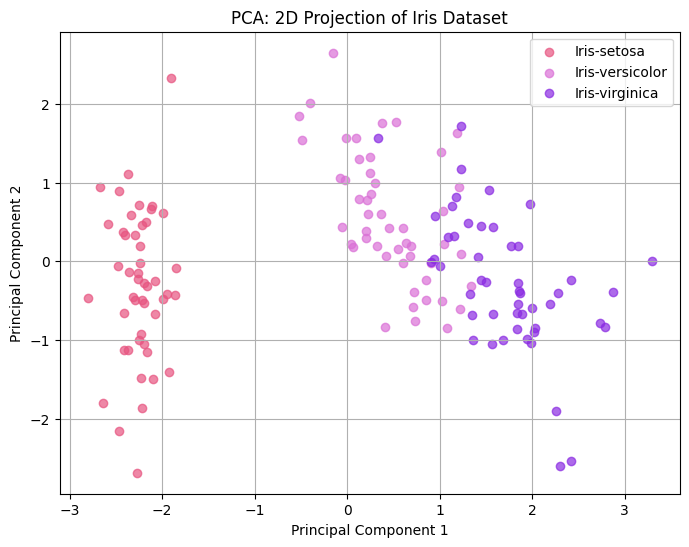

In [68]:
# PCA Visualization
colors = {
    'Iris-setosa': '#e75480',       # pink
    'Iris-versicolor': '#da70d6',   # orchid
    'Iris-virginica': '#8a2be2'     # blue violet
}

plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=label,
        alpha=0.7,
        color=colors[label]  # this will now work
    )
plt.title("PCA: 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

The PCA visualization reveals a strong separation between the Iris-setosa class and the other two, suggesting that this class is linearly separable in the original feature space. Iris-versicolor and Iris-virginica, however, display some degree of overlap, which implies that their feature distributions are more similar and harder to separate in just two principal components.

Principal Component 1 captures the largest variance in the data, likely associated with petal length and width — features known to be highly discriminative in the Iris dataset. While PCA successfully condenses the data into a two-dimensional space for visualization, its linear nature may not fully capture more complex relationships between the classes, especially between Versicolor and Virginica.

Nevertheless, the visualization is informative for exploratory analysis and suggests that PCA can reduce dimensionality without a significant loss of class structure, at least for the most distinct class.

##### MDS (Multidimensional Scaling) Implementation from Scratch on Iris Dataset

Step 1 & 2: Compute Pairwise Distances & Build Distance Matrix

*We’ll use Euclidean distance to compute all pairwise distances between rows (samples), then build a square distance matrix.*

In [69]:
# Step 1 & 2: Compute pairwise Euclidean distances and build distance matrix
D = squareform(pdist(X_scaled, metric='euclidean'))  # D is a (n x n) distance matrix
D[:5, :5]

array([[0.        , 1.1732925 , 0.84385814, 1.10134816, 0.25955375],
       [1.1732925 , 0.        , 0.52223205, 0.43335716, 1.38296998],
       [0.84385814, 0.52223205, 0.        , 0.2835189 , 0.98924953],
       [1.10134816, 0.43335716, 0.2835189 , 0.        , 1.24725052],
       [0.25955375, 1.38296998, 0.98924953, 1.24725052, 0.        ]])

Step 3: Apply Classical MDS Algorithm

*The idea is to use the distance matrix D and apply double-centering to transform it into an inner-product matrix B, which we can then decompose into eigenvalues and eigenvectors.*

In [70]:
# Number of samples
n = D.shape[0]

# Centering matrix
H = np.eye(n) - np.ones((n, n)) / n

# Double centering to get the Gram matrix (inner product matrix)
B = -0.5 * H @ (D ** 2) @ H

# Eigen decomposition
eigenvalues_mds, eigenvectors_mds = np.linalg.eigh(B)

# Sort by largest eigenvalues
idx = np.argsort(eigenvalues_mds)[::-1]
eigenvalues_mds = eigenvalues_mds[idx]
eigenvectors_mds = eigenvectors_mds[:, idx]

# Take the top 2 dimensions
X_mds = eigenvectors_mds[:, :2] * np.sqrt(eigenvalues_mds[:2])

print("Data dimension after PCA:", X_pca.shape)

Data dimension after PCA: (147, 2)


In [71]:
X_mds[:5]

array([[-2.29165366, -0.48657587],
       [-2.11542834,  0.66601465],
       [-2.39606952,  0.33249272],
       [-2.33243473,  0.5877082 ],
       [-2.41539508, -0.65393005]])

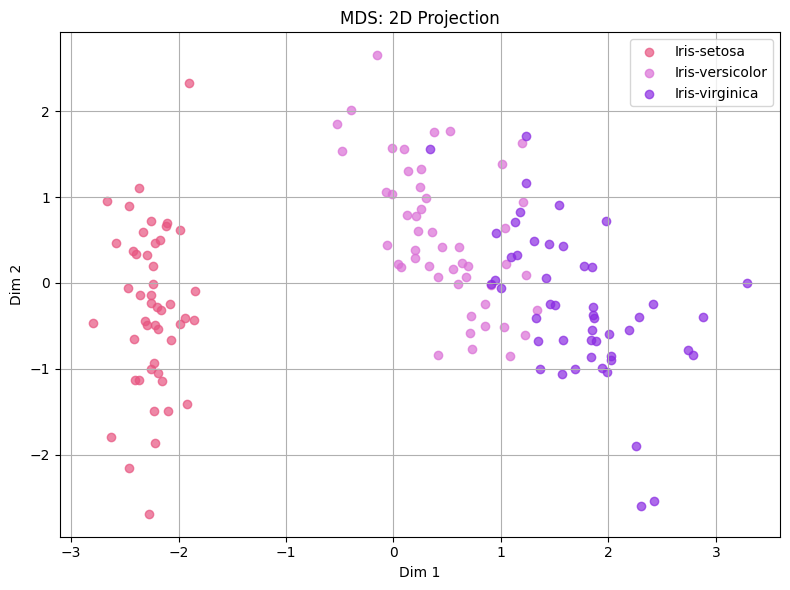

In [72]:
# Plot MDS
colors = {
    'Iris-setosa': '#e75480',       # pink
    'Iris-versicolor': '#da70d6',   # orchid
    'Iris-virginica': '#8a2be2'     # blue violet
}
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(
        X_mds[y == label, 0],
        X_mds[y == label, 1],
        label=label,
        alpha=0.7,
        color=colors[label]
    )
plt.title("MDS: 2D Projection")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The MDS visualization also demonstrates a clear separation of the Iris-setosa class from the other two, indicating that the distance-based relationships in the original feature space distinctly isolate this group. Iris-versicolor and Iris-virginica, however, appear more intermixed, with several data points lying near the boundary between the two classes. This suggests that, based on pairwise distances, the distinction between these two species is less pronounced.

Unlike PCA, which projects data based on variance, MDS seeks to preserve the relative distances among data points. This allows MDS to potentially capture subtle, non-linear structures. In this case, the arrangement of points in MDS space reflects the proximity relationships in the high-dimensional data, though it does not provide interpretable axes linked to specific features.

Overall, the MDS plot offers a complementary view to PCA, emphasizing how the inherent distances between samples relate to class membership. While it does not enhance class separation beyond what PCA provides in this dataset, it reinforces the separability of Iris-setosa and highlights the ambiguity between Versicolor and Virginica.

#### PCA and MDS Comparison

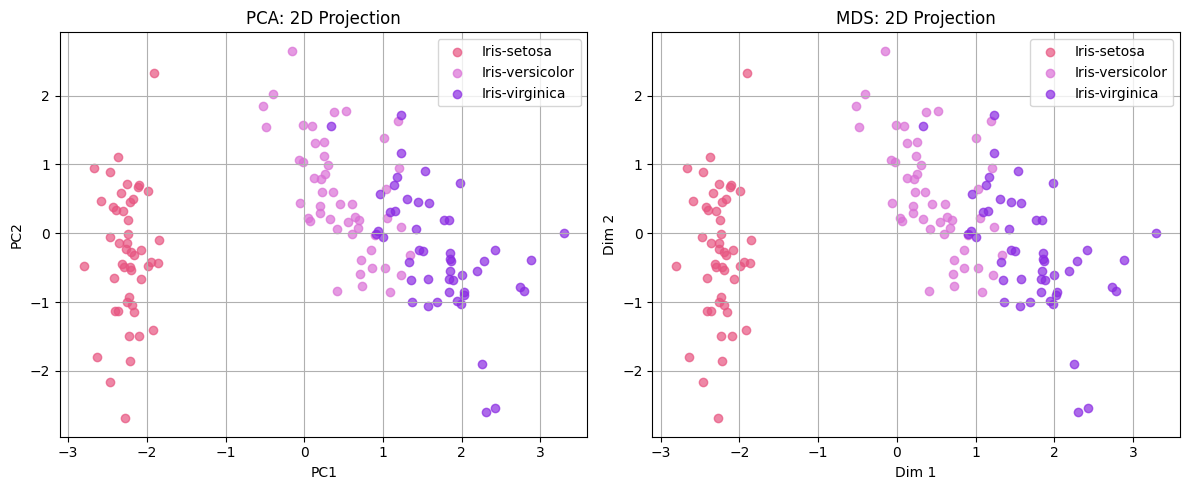

In [73]:
# PCA vs. MDS
colors = {
    'Iris-setosa': '#e75480',       # pink
    'Iris-versicolor': '#da70d6',   # orchid
    'Iris-virginica': '#8a2be2'     # blue violet
}

plt.figure(figsize=(12, 5))

# Plot PCA
plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=label,
        alpha=0.7,
        color=colors[label]
    )
plt.title("PCA: 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)

# Plot MDS
plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(
        X_mds[y == label, 0],
        X_mds[y == label, 1],
        label=label,
        alpha=0.7,
        color=colors[label]
    )
plt.title("MDS: 2D Projection")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Although PCA and MDS are fundamentally different techniques—PCA preserving variance and MDS preserving pairwise distances—their 2D visualizations of the Iris dataset appear remarkably similar. This is likely because the Iris dataset has a well-structured and low-dimensional nature, where both variance and distance align in a way that reveals consistent class groupings. However, in more complex datasets, PCA and MDS often produce very different projections.

#### Comparative Analysis of PCA and MDS Projection Results



***Comparative Analysis of PCA and MDS Projection Results***

1. **Class Separation**

In both projection results (PCA and MDS), the Iris-setosa class appears clearly separated from the other two classes. This indicates that both PCA and MDS are equally capable of isolating this class due to its distinct characteristics.  
However, for the Iris-versicolor and Iris-virginica classes, there is a noticeable overlap in both visualizations. Nevertheless, the PCA projection seems to provide slightly more distinct separation between these two classes compared to MDS.

2. **Interpretation of Reduced Dimensions**

PCA generates new dimensions (PC1 and PC2) as linear combinations of the original features, ordered based on the highest variance contribution. Therefore, the resulting PCA dimensions can still be interpreted and used to understand the dominant directions in the data.

In contrast, MDS does not produce dimensions derived from the original features. The dimensions resulting from MDS projections are more spatial in nature and do not carry explicit mathematical meaning. Its main objective is to preserve the distances between samples as in the original data. Thus, numerical interpretation of MDS dimensions is not applicable.

3. **Strengths and Limitations of Each Method**

**PCA:**  
The main advantage of PCA lies in its efficiency and its ability to produce interpretable new dimensions. This method is particularly suitable when we want to understand the variance structure in the data, especially if the relationships among features are linear. However, PCA cannot capture non-linear relationships in the data.

**MDS:**  
The key strength of MDS is its ability to preserve the distances between samples, making it ideal for visual analysis that focuses on the similarity between data points. MDS can also be used to uncover non-linear structures (especially when using non-metric MDS). However, MDS tends to be slower and does not offer direct interpretability of its projection dimensions.

**Conclusion**

*Although PCA and MDS use different approaches, on the well-structured and low-dimensional Iris dataset, both produce similar 2D projections. Iris-setosa is clearly separated, while Iris-versicolor and Iris-virginica show overlapping areas. PCA is superior in terms of dimensional interpretation and computational efficiency, while MDS excels in preserving pairwise distances between data points. On more complex or non-linear datasets, the difference between PCA and MDS projection results can become much more significant.*

This analysis demonstrated how Principal Component Analysis (PCA) and Multidimensional Scaling (MDS) can be effectively applied to visualize high-dimensional data in two dimensions. After thorough preprocessing—including handling duplicates, validating data quality, and standardizing numerical features—the Iris dataset was projected using both PCA and MDS. While PCA captured the directions of maximum variance and allowed for interpretability of components, MDS focused on preserving pairwise distances to reflect relational proximity between samples. Both methods successfully highlighted the distinct nature of the Iris-setosa class and revealed partial overlap between Iris-versicolor and Iris-virginica. These findings underscore the importance of using complementary dimensionality reduction techniques to gain deeper insights into data structure, especially in early stages of exploratory data analysis. Although PCA and MDS produced similar visual groupings in this case due to the structured nature of the Iris dataset, more complex datasets may benefit differently from each method’s strengths.